In [18]:
import pandas as pd

ROOT_PATH = ''

In [19]:
import json
from pandas.io.json import json_normalize

with open (ROOT_PATH + 'train/labels/guatemala-volcano_00000000_post_disaster.json') as f:
    data = json.load(f)

# convert buildings json data into pandas dataframe:
buildings_raw = data['features']['xy']
buildings_df = pd.DataFrame.from_dict(json_normalize(buildings_raw), orient='columns')
buildings_df

,properties.feature_type,properties.subtype,properties.uid,wkt
0,building,no-damage,d19330eb-0203-43f2-9c72-69d57d19c606,"POLYGON ((532.1863714054954 165.9824503000504,..."
1,building,no-damage,6f565ab6-00bd-4407-9399-8a27054edb10,"POLYGON ((810.6063087761681 743.0540229226118,..."
2,building,no-damage,cc5d8b81-db3a-4958-9add-312cb2ae39ea,"POLYGON ((1023.496880254201 854.6598863601454,..."
3,building,no-damage,5158807e-568c-4c24-99e9-7d47818828a4,"POLYGON ((1023.496779355264 937.0904197282952,..."
4,building,no-damage,f974bf86-70b1-4e46-8c8c-f14c0987d3f7,"POLYGON ((1023.49670602115 988.0186053329112, ..."
5,building,no-damage,4696c7ca-2a87-45e0-97b1-ba5b3e45d9ff,"POLYGON ((944.3397244786014 1022.980324969038,..."
6,building,no-damage,07992cd5-3b97-4ba9-9714-ddaa6bb79832,"POLYGON ((512.2005969012966 473.0835635061429,..."
7,building,no-damage,014181e7-2cb0-45db-a4b8-b452c2b43738,"POLYGON ((459.6961316036035 88.34711095609332,..."
8,building,no-damage,aa39a466-7ad7-4a25-a97c-16f7380801bd,POLYGON ((418.9271900639632 0.0060774937897865...
9,building,no-damage,c6143129-f968-4dcc-8822-61040fdd61fa,"POLYGON ((925.1958607115536 563.2548993988472,..."


In [20]:
# for a single image
buildings_df['properties.subtype'].value_counts()

no-damage    10
Name: properties.subtype, dtype: int64

In [21]:
from shapely.geometry import Polygon
import shapely.wkt

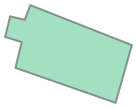

In [22]:
P = shapely.wkt.loads(data['features']['xy'][0]['wkt'])
P

In [23]:
P.bounds

(420.8981825090282, 165.9824503000504, 548.6019827848852, 264.4761185678668)

### Building damage counts for all images

In [24]:
import os

# get all files for post disaster
directory = ROOT_PATH + 'train/labels/'
pattern = 'post'

post_disaster_files = [f for f in os.listdir(directory) if pattern in f]

In [25]:
# loop over post disaster data
all_json_data = []
for file in post_disaster_files:
    with open(directory + file) as f:
        data = json.load(f)
        all_json_data.append(data)

In [26]:
df = pd.DataFrame()
for curr_data in all_json_data:
    curr_building_raw = curr_data['features']['xy']
    df = df.append(json_normalize(curr_building_raw))
df

,properties.feature_type,properties.subtype,properties.uid,wkt
0,building,no-damage,d19330eb-0203-43f2-9c72-69d57d19c606,"POLYGON ((532.1863714054954 165.9824503000504,..."
1,building,no-damage,6f565ab6-00bd-4407-9399-8a27054edb10,"POLYGON ((810.6063087761681 743.0540229226118,..."
2,building,no-damage,cc5d8b81-db3a-4958-9add-312cb2ae39ea,"POLYGON ((1023.496880254201 854.6598863601454,..."
3,building,no-damage,5158807e-568c-4c24-99e9-7d47818828a4,"POLYGON ((1023.496779355264 937.0904197282952,..."
4,building,no-damage,f974bf86-70b1-4e46-8c8c-f14c0987d3f7,"POLYGON ((1023.49670602115 988.0186053329112, ..."
5,building,no-damage,4696c7ca-2a87-45e0-97b1-ba5b3e45d9ff,"POLYGON ((944.3397244786014 1022.980324969038,..."
6,building,no-damage,07992cd5-3b97-4ba9-9714-ddaa6bb79832,"POLYGON ((512.2005969012966 473.0835635061429,..."
7,building,no-damage,014181e7-2cb0-45db-a4b8-b452c2b43738,"POLYGON ((459.6961316036035 88.34711095609332,..."
8,building,no-damage,aa39a466-7ad7-4a25-a97c-16f7380801bd,POLYGON ((418.9271900639632 0.0060774937897865...
9,building,no-damage,c6143129-f968-4dcc-8822-61040fdd61fa,"POLYGON ((925.1958607115536 563.2548993988472,..."


In [27]:
# for all buildings:
df['properties.subtype'].value_counts()

no-damage        117594
minor-damage      14983
major-damage      14161
destroyed         13230
un-classified      2993
Name: properties.subtype, dtype: int64

In [28]:
### Building damages for hurricanes
post_disaster_hurricane_files = [f for f in os.listdir(directory) if 'hurricane' in f]
post_disaster_hurricane_files = list(filter(lambda x: 'post' in x, post_disaster_hurricane_files))



In [29]:
hurricane_json_data = []
for file in post_disaster_hurricane_files:
    with open(directory + file) as f:
        data = json.load(f)
        hurricane_json_data.append(data)

In [30]:
df_hurricane = pd.DataFrame()
for curr_hurricane_data in hurricane_json_data:
    df_hurricane = df_hurricane.append(json_normalize(curr_hurricane_data['features']['xy']))
df_hurricane

,properties.feature_type,properties.subtype,properties.uid,wkt
0,building,no-damage,e8ea2181-a419-4cd6-91cd-2dba5ca7aaa5,POLYGON ((126.2051261436394 0.0061842731101246...
1,building,no-damage,1873e8e9-d9fc-4641-b902-974ed2876f47,"POLYGON ((65.29503301122639 68.78942666368798,..."
2,building,no-damage,4158bc1b-7659-4e24-8342-623f0a6629a4,"POLYGON ((70.75181080278546 71.87294373746016,..."
3,building,no-damage,85dac9f4-94dd-4ecf-ac19-af3399cd0e39,"POLYGON ((207.6774983777775 3.815615647559958,..."
4,building,no-damage,3fcb1f7c-694d-4752-adc1-f602879089b9,"POLYGON ((209.8367254539228 16.89093516376678,..."
5,building,no-damage,64d6dbf3-1092-4e59-b4d0-383b9036f8ad,"POLYGON ((200.7626320138524 67.18585127274473,..."
6,building,no-damage,180cadc3-95ba-4316-b036-1f4d35b6db7a,"POLYGON ((222.9546880724871 82.66031198884008,..."
7,building,no-damage,71f6e94a-001d-43f5-9366-15508c157ae8,POLYGON ((313.7682495084588 0.0088029843111189...
8,building,no-damage,af3b0ecc-ce65-4ed0-8d67-ec583deaa78d,"POLYGON ((206.9336450591752 130.5607016345839,..."
9,building,no-damage,d0ea4aac-8dd8-4d7f-b29f-2db7c062d194,"POLYGON ((88.90351587444695 140.6492828642639,..."


In [31]:
# for hurricane buildings:
df_hurricane['properties.subtype'].value_counts()

no-damage        33219
minor-damage     14553
major-damage     13330
destroyed         3359
un-classified     1631
Name: properties.subtype, dtype: int64

In [32]:
from shapely.geometry import Polygon

In [33]:
polygon_data = []
for image_meta in hurricane_json_data:
    for building in image_meta['features']['xy']:
        polygon_data.append((building['wkt'], building['properties']['subtype']))

polygon_bounds = []
for polygon in polygon_data:
    shapely_obj = shapely.wkt.loads(polygon[0])
    poly_bound = shapely_obj.bounds
    polygon_bounds.append((poly_bound[2]-poly_bound[0], poly_bound[3]-poly_bound[1]))

#P = shapely.wkt.loads(hurricane_json_data['features']['xy'][0]['wkt'])

In [34]:
polygon_widths = [polygon[0] for polygon in polygon_bounds]
polygon_y = [polygon[1] for polygon in polygon_bounds]

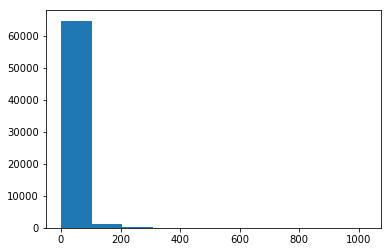

101.6361505683255

In [61]:
import matplotlib.pyplot as plt
import math
import numpy as np

poly_x_log = [math.log(polygon) for polygon in polygon_widths]
# plt.hist(poly_x_log)
plt.hist(polygon_widths)
plt.show()

#find 98 percentile
np_p_widths = np.array(polygon_widths)
crop_lim = np.percentile(np_p_widths, 98)
crop_lim #calculates the 98 percentile

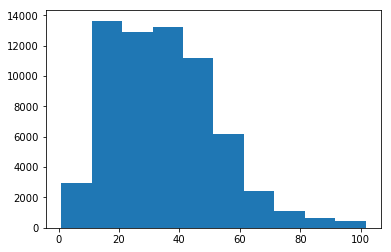

In [62]:
cropped_widths = [x for x in polygon_widths if x <= crop_lim]
plt.hist(cropped_widths)
plt.show()

In [63]:
print(len(polygon_widths))
print(len(cropped_widths))

66092
64770


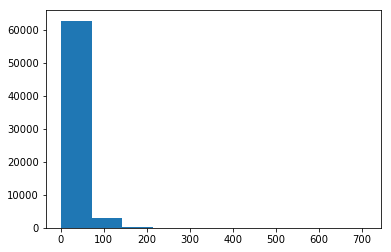

In [64]:
plt.hist(polygon_y)
plt.show()

In [39]:
cropped_y = [y for y in polygon_y if y <= 75]
print(len(polygon_y))
print(len(cropped_y))

66092
63223


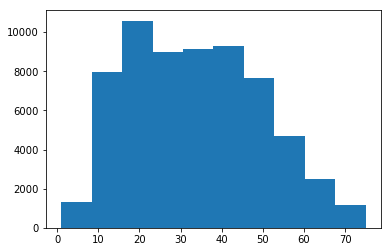

In [45]:
plt.hist(cropped_y)
plt.show()